<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">M1.871 · Privacidad</p>
    <p style="margin: 0; text-align:right;">Máster Universitario en Ciberseguridad y Privacidad</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Práctica 2


---

Introducción
-----------------------------------------------------

---

En esta práctica, el alumno implementará una red DC (*Dining Cryptographers*) desde cero. Además, el alumno deberá evaluar las propiedades de privacidad y de resistencia al análisis del tráfico de esta red.

La práctica se divide en dos partes con dos ejercicios cada una. En los ejercicios de la primera parte se implementará el protocolo de la *cena de los criptógrafos* sin tener acceso a la red. En la segunda parte, se utilizará el protocolo implementado en la primera parte como primitiva para construir una red de comunicaciones anónimas DC, la cual utilizará una red simulada.

Cada parte consta de unos preliminares, donde explicamos conceptos de programación que serán útiles para la parte de programación de los ejercicios. En los preliminares de la Parte 1, explicamos los conceptos básicos de programación orientada a objetos que serán útiles para implementar el protocolo de la cena de los criptógrafos básico. En los preliminares de la Parte 2, explicamos como utilizar la librería SimPy para hacer una simulación en red como la que usaremos para simular la red de comunicaciones anónimas DC.

Los ejercicios tienen una parte de programación, donde el alumno tendrá que implementar alguno de los componentes de la red DC, y una parte de preguntas teóricas y de reflexión. La mayoría de las preguntas no dependen de la parte de programación y se pueden responder basándose en los materiales de la asignatura. Recomendamos que si alguien tiene problemas con la implementación, que se centre en responder estas preguntas.

La práctica se puntúa sobre 10 puntos:

* [Preliminares I: programación orientada a objetos](#Preliminares-I:-programación-orientada-a-objetos)


* [Parte 1](#Parte-1)
  - [Ejercicio 1 (1.5 puntos)](#Ejercicio-1-(1.5-puntos)): implementar y testear la clase básica de la cena de los criptógrafos.
  - [Ejercicio 2 (1.5 puntos)](#Ejercicio-2-(1.5-puntos)): extender la clase anterior para que los criptógrafos puedan enviar mensajes de más de un bit.
  - [Preguntas (2.5 puntos)](#Parte-1:-Preguntas-(2.5-puntos))


* [Preliminares II: simulaciones de eventos discretos](#Preliminares-II:-simulaciones-de-eventos-discretos)



* [Parte 2](#Parte-2)
  - [Ejercicio 3 (1 punto)](#Ejercicio-3-(1-punto)): simular una red DC sin sincronización utilizando la clase del ejercicio 2.
  - [Ejercicio 4 (1 punto)](#Ejercicio-4-(1-punto)): sincronizar los nodos de la red DC para que implementen un protocolo de tráfico dummy constante.
  - [Preguntas (2.5 puntos)](#Parte-2:-Preguntas-(2.5-puntos))
  
### Escenario

Durante la práctica consideraremos el siguiente escenario. La red DC se quiere utilizar como un sistema para informantes y disidentes que quieren publicar documentos filtrados de interés público (como WikiLeaks).

La arquitectura de la red DC consiste en un servidor central que recibe los mensajes de los nodos DC, realiza las operaciones XOR sobre los mensajes que recibe y publica el resultado (documentos filtrados). Un cliente de la red tiene que utilizar uno de los nodos DC para enviar documentos. El servidor puede que no forme parte de la red y puede estar interesado en descubrir quien envía el documento, pero aplica las operaciones XOR correctamente.

En la primera parte de la práctica, nos limitaremos a construir las primitivas de la red (los nodos que implementan el protocolo de la cena de los criptógrafos). En la segunda parte, simularemos una red DC de tres nodos con y sin sincronización. Los detalles de la red con y sin sincronización se explican en los enunciados de los ejercicios 3 i 4.

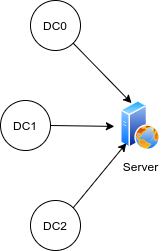

## Preliminares I: programación orientada a objetos

---

Python nos permite crear clases, de forma que podemos aprovechar todas las ventajas de la programación orientada a objetos también en este lenguaje. En esta sección, presentaremos las funcionalidades más esenciales de las clases de Python y aprovecharemos para repasar los conceptos básicos de programación orientada a objetos.

Para **definir** una clase en Python usamos la palabra clave `class`. Dentro de una clase podremos definir un conjunto de **métodos**, que no son más que funciones que sirven de interfaz de la clase con lo que hay fuera de esta. 

In [82]:
class Client:

    def public_value(self):
        self.k_pub = pow(self.alpha, self.a, self.p)
        return self.k_pub

    def shared_key(self, k_pub_counter_part):
        self.shared_key = pow(k_pub_counter_part, self.a, self.p)
        return self.shared_key

Del mismo modo que con la definición de funciones, la definición de una clase es solo una descripción de esta. Por lo tanto, al describir una clase no estamos ejecutando nada. Para crear un objeto de una clase, necesitaremos ***instanciar*** esta clase. La notación que se usa en Python para crear una instancia de una clase consiste en usar el nombre de la clase seguido de dos paréntesis, como si fuera una llamada a una función:

In [83]:
un_client = Client()

De este modo, la variable `un_cliente` contiene una instancia de la clase `Client`. Esto nos crearía un cliente sin datos. A veces, sin embargo, nos puede interesar personalizar esta inicialización. Las clases tienen un método especial que se denomina **constructor** (`__init__`) y que se llama cuando se tiene que instanciar una clase. Así pues, si incluimos este método especial en nuestra clase, el método se invocará cuando se instancie un nuevo objeto. 

In [84]:
class Client:

    def __init__(self):
        self.alpha = 3
        self.a = 221
        self.p = 1087

    def public_value(self):
        self.k_pub = pow(self.alpha, self.a, self.p)
        return self.k_pub

    def shared_key(self, k_pub_counter_part):
        self.shared_key = pow(k_pub_counter_part, self.a, self.p)
        return self.shared_key


un_client = Client()

Ahora, al crear un objeto de la clase `Client`, el objeto contendría una variable con los tres valores especificados. Adicionalmente, el método `__init__` acepta parámetros, lo que nos permite personalizar todavía más la inicialización de los objetos de nuestra clase.

In [85]:
class Client:

    def __init__(self, alpha, a, p):
        self.alpha = alpha
        self.a = a
        self.p = p

    def public_value(self):
        self.k_pub = pow(self.alpha, self.a, self.p)
        return self.k_pub

    def shared_key(self, k_pub_counter_part):
        self.shared_key = pow(k_pub_counter_part, self.a, self.p)
        return self.shared_key


un_client = Client(3, 221, 1087)
un_a_client = Client(3, 254, 1087)

Con este código, especificaremos los tres parámetros que queremos que almacene cada cliente en el momento de instanciar la clase. De este modo, podemos crear dos objetos de la clase cliente, cada uno de los cuales tiene unos parámetros diferentes almacenados.

Una vez tenemos una instancia de una clase, podemos invocar los métodos. Para hacerlo, usaremos el nombre del objeto seguido de un punto, el nombre del método y unos paréntesis entre los que incluiremos los argumentos:

In [86]:
un_client.shared_key(679)

731

En los ejemplos de código que hemos visto hasta ahora puede parecer que hay un error: el número de argumentos que usamos al instanciar el objeto o llamar a los métodos es diferente del número de argumentos que hay en la definición de los respectivos métodos. Precisamente, lo que distingue los métodos de una clase de las funciones es que el primer argumento que reciben como parámetro es un objeto de la misma clase. Por convención, denominamos este primer argumento **`self`**. Así pues, la llamada a `blind_message` anterior es equivalente a:

In [87]:
Client.shared_key(un_client, 679)

731

Este primer argumento nos permite llamar métodos de la clase desde la misma clase:

In [88]:
class Client:

    def shared_key(self, k_pub_counter_part):
        self.shared_key = pow(k_pub_counter_part, self.a, self.p)
        return self.shared_key

    def call_shared_key(self, k_pub_counter_part):
        self.shared_key()

Otro detalle que podemos apreciar de los ejemplos son las asignaciones que se hacen a `self.alpha`, `self.a` y `self.p`, entre otros. Estas variables son **variables de instancia**, de forma que cada instancia de la clase `Client` tendrá su copia de estas variables. En Python también podemos definir **variables de clase**, que son variables que comparten todas las instancias de una misma clase. En el siguiente ejemplo, podemos ver la diferencia entre los dos tipos de variables:

In [89]:
class Client:

    shared_type = "DH"

    def __init__(self, alpha, a, p):
        self.alpha = alpha
        self.a = a
        self.p = p

In [90]:
client_1 = Client(3, 221, 1087)
client_2 = Client(3, 254, 1087)

print(client_1.alpha, client_1.a, client_1.p)
print(client_2.alpha, client_2.a, client_2.p)

3 221 1087
3 254 1087


In [91]:
print(Client.shared_type, client_1.shared_type, client_2.shared_type)
Client.shared_type = "ECDH"
print(Client.shared_type, client_1.shared_type, client_2.shared_type)

DH DH DH
ECDH ECDH ECDH


Hay que tener cuidado a la hora de modificar los valores de las variables de clase, puesto que hacerlo a través de los objetos puede tener resultados diferentes de los que esperaría el programador. El lector interesado puede consultar la extensa documentación en línea ([1](http://stackoverflow.com/questions/68645/static-class-variables-in-python), [2](http://anandology.com/python-practice-book/object_oriented_programming.html)) para adentrarse en el mundo de la programación orientada a objetos en Python, a pesar de que lo que hemos visto en esta sección es suficiente para realizar la práctica.

Finalmente, una vez tenemos definidos a los usuarios de nuestro protocolo como clases de Python, podemos implementar todo el protocolo haciendo llamadas a estas clases. Por ejemplo, la clase `Client` del ejemplo anterior corresponde a un usuario del protocolo de intercambio de claves de Diffie y Hellman. Por lo tanto, la implementación del protocolo sería la que se muestra a continuación. 

In [92]:
class Client:

    def __init__(self, alpha, a, p):
        self.alpha = alpha
        self.a = a
        self.p = p

    def public_value(self):
        self.k_pub = pow(self.alpha, self.a, self.p)
        return self.k_pub

    def shared_key(self, k_pub_counter_part):
        self.shared_key = pow(k_pub_counter_part, self.a, self.p)
        return self.shared_key


user_A = Client(3, 221, 1087)
user_B = Client(3, 254, 1087)

protocol_step_1 = user_A.public_value()
protocol_step_2 = user_B.public_value()
shared_key_A = user_A.shared_key(protocol_step_2)
shared_key_B = user_B.shared_key(protocol_step_1)

print("Shared key obtained by A = {}. Shared key obtained by B = {}".format(
            shared_key_A, shared_key_B))

Shared key obtained by A = 895. Shared key obtained by B = 895


## Parte 1

---

### Ejercicio 1 (1.5 puntos)


En este primer ejercicio tendréis que implementar el protocolo criptográfico de la cena de los criptógrafos básico. Para hacerlo, podéis suponer que cada pareja de criptógrafos ha compartido un secreto antes de ejecutar el protocolo. Tendréis que implementarlo siguiendo el paradigma de programación orientada a objetos que hemos introducido en los preliminares anteriores. Para hacer este primer ejercicio, podéis suponer que el bit del mensaje se codifica como un booleano.

**Apartado A (1 punto)** Implementad los siguientes métodos `__init__`, `set_secrets` y `encode` de la clase `DCBasic`, el esqueleto de la cual encontraréis a continuación:

- `__init__`: es el constructor de la clase. Recibe como parámetros el nombre del nodo. El constructor inicializa la lista de secretos compartidos y el atributo `name`.

- `set_secrets`: es el *setter* del atributo `secrets` (la lista de secretos compartidos).

- `encode`: este método implementa la operación XOR del protocolo de la cena de los criptógrafos entre los mensajes (de un bit) que recibe como argumentos.

In [93]:
class DCBasic():
    """This class implements a cryptographer node of the basic
    Dining Cryptographers protocol.
    """
    def __init__(self, name):
        """
        Initialize class attributes.
        """
        # --- IMPLEMENTATION GOES HERE ---
        self.name= name
        #default secrets list(doesnt make much sense but is required)
        self.secrets = self.set_secrets([0,1])
        # --------------------------------

    def set_secrets(self, secrets):
        """
        Set the node's secrets.

        This method has to initialize secrets shared with
        this node's neighbors.
        
        :param secrets: list of integers.
        """
        # --- IMPLEMENTATION GOES HERE ---
        self.first_secret=secrets[0]
        self.second_secret=secrets[1]

        # --------------------------------
        
    def encode(self, bit):
        """
        Compute the DC's operation.

        This method performs the XOR operation on the secrets
        and the `bit` parameter.
        
        :param bit: bool, bit to encode.
        :return: bool, result of the operation.
        """
        # --- IMPLEMENTATION GOES HERE ---
        self.public_bit= self.first_secret ^ self.second_secret ^ bit
        return self.public_bit

        # --------------------------------
        
    """
    Test
    daniC=DCBasic("dani")
    print(daniC.name)
    print(f"Default first node secret  {daniC.first_secret}")
    print(f"Default second node secret {daniC.second_secret}")
    daniC.set_secrets([1,0])
    print(f"Changed secret first node {daniC.first_secret}")
    print(f"Changed secret second node {daniC.second_secret}")

    print(f"encoding result for 0 =>{daniC.encode(0)}")
    print(f"encoding result for 1 =>{daniC.encode(1)}")
    """

---

**Apartado B (0.5 punts)** Supón que uno de los DCs ha pagado la cena. Crea tres instancias de la clase `DCBasic`, inicializa los secretos y envía mensajes a cada criptógrafo. Finalmente, comprueba que, efectivamente, uno de los DCs ha pagado la cena.

Para inicializar los secretos tendrás que implementar la función `calc_secret` la cual genera un bit aleatorio.


In [94]:
import random

# implement a method to generate the secrets
def calc_secret():
    # --- IMPLEMENTATION GOES HERE ---
    return random.randint(0,1)
    # --------------------------------
#Tester

#for i in range(10):
#    print(f"Iteration {i} secret {calc_secret()}")


In [95]:
# create three instances of the DCBasic class
# --- IMPLEMENTATION GOES HERE ---
daniA=DCBasic("dani")
pepeB=DCBasic("pepe")
juanC=DCBasic("juan")
# --------------------------------

In [96]:

# generate three secrets
# --- IMPLEMENTATION GOES HERE ---
AB_secret=calc_secret()
AC_secret=calc_secret()
BC_secret=calc_secret()
# --------------------------------

In [97]:
# share each secret with a pair of cryptographers:
# --- IMPLEMENTATION GOES HERE ---
#setting dani secrets
daniA.set_secrets([AB_secret,AC_secret])
#setting pepe secrets
pepeB.set_secrets([AC_secret,BC_secret])
#setting juan secrets
juanC.set_secrets([AB_secret,BC_secret])
# --------------------------------

In [98]:
# the cryptographers encode their messages (one of them has paid):
# --- IMPLEMENTATION GOES HERE ---
#lets make juan pay for the food
daniA.encode(0)
pepeB.encode(0)
juanC.encode(1)
# --------------------------------

0

In [99]:
# compute the result:
# --- IMPLEMENTATION GOES HERE ---
def check_paid(public_bits):
    #:param public_bits: list of integers.
    return public_bits[0] ^ public_bits[1] ^ public_bits[2]
# --------------------------------
result = check_paid([daniA.public_bit,pepeB.public_bit,juanC.public_bit])


---

Comprueba si la NSA ha pagado la cena:

In [100]:
if result == 0:
    print("The NSA has paid.")
else:
    print("A cryptographer has paid.")

A cryptographer has paid.


### Ejercicio 2 (1.5 puntos)

Extiende la clase anterior (`DCBasic`) a una nueva clase llamada `DCPadded` para que los criptógrafos puedan transmitir mensajes de más de un bit. Aún puedes suponer que cada pareja de criptógrafos tiene un secreto compartido. Los mensajes tienen que tener un tamaño fijo definido en el constructor de la clase. Ten en cuenta que esto quiere decir que si un mensaje es más pequeño que el tamaño fijado, tendremos que añadir *padding* al final del mensaje. El *padding* será una secuencia de ceros que se añadirá al final del mensaje para que su tamaño llegue a tamaño predefinido. Podéis suponer que no se envían mensajes más grandes que la mida fijada.

- Haced uso del tipo de datos `bytes` para codificar los mensajes: https://docs.python.org/3/library/stdtypes.html#bytes-objects

- Podéis utilizar el método `os.urandom` para generar una secuencia de bytes aleatoria.

- Podéis utilizar el constructor del tipo de datos `bytes(size)` para construir una secuencia de bytes vacía de tamaño `size`.

**Apartado A (1 punto)** Implementa los métodos `pad` y `encode` de la clase `DCPadded`.

- `pad`: este método recibe un mensaje y añade el *padding* necesario para llegar al tamaño predefinido. Devuelve el mensaje con el *padding*.
- `encode`: como antes, realiza la operación XOR pero ahora lo hace con mensajes de más de un bit.
- `__init__`: el constructor tiene que analizar un nuevo atributo llamado `msglen` que especifica el tamaño fijo de los mensajes.

In [101]:
class DCPadded(DCBasic):
    """This class extends the class `DCBasic` to support messages
    that are longer than one bit.
    """
    def __init__(self, name, msglen):
        """
        Initialize class attributes.
        """
        # --- IMPLEMENTATION GOES HERE ---
        self.name=name
        self.msglen=msglen
        # --------------------------------
        
    def pad(self, message):
        """
        Pad the message to a fixed length.
        
        :param message: bytes, message to pad.
        :return: bytes, padded message.
        """
        # --- IMPLEMENTATION GOES HERE ---
        # fixed length
        return message.ljust(self.msglen,b'\x00')
        # --------------------------------

    def encode(self, message):
        """
        Compute the DC's operation.

        This method performs the XOR operation on the secrets
        and the `message` argument.
        
        :param message: bytes, message to encode.
        :return: bytes, result of the operation.
        """
        # --- IMPLEMENTATION GOES HERE ---
        pad_msg=self.pad(message)
        self.public_msg =bytes([b0 ^ b1 ^ b2 for b0, b1, b2 in zip(pad_msg, self.first_secret, self.second_secret)])
        return self.public_msg
        # --------------------------------

---

**Apartado B (0.5 punts)** Crea tres instancias de la nueva clase con el tamaño especificado en una variable global llamada `MSGLEN`, y haz que uno de los criptógrafos envíe un mensaje.

In [102]:
MSGLEN = 50  # bytes

In [103]:
# --- IMPLEMENTATION GOES HERE ---
daniA=DCPadded("dani",MSGLEN)
pepeB=DCPadded("pepe",MSGLEN)
juanC=DCPadded("juan",MSGLEN)
# --------------------------------

In [104]:
import os

# genera un secreto para cada par de criptógrafos
def calc_secret(msglen):
    # --- IMPLEMENTATION GOES HERE ---
    return os.urandom(msglen)
    # --------------------------------

In [105]:
# generate three secrets
# --- IMPLEMENTATION GOES HERE ---
AB_secret=calc_secret(MSGLEN)
AC_secret=calc_secret(MSGLEN)
BC_secret=calc_secret(MSGLEN)
# --------------------------------

In [106]:
# assigna a cada criptógrafo el secreto compartido con cada uno de sus vecinos
# --- IMPLEMENTATION GOES HERE ---
#setting dani secrets
daniA.set_secrets([AB_secret,AC_secret])
#setting pepe secrets
pepeB.set_secrets([AC_secret,BC_secret])
#setting juan secrets
juanC.set_secrets([AB_secret,BC_secret])
# --------------------------------

In [107]:
# uno de los criptógrafos envía un mensaje
#message = b'\x01' * 4+ b'\x02' * 4
message=b'\x44\x61\x6e\x69\x65\x6c\x20\x53\x61\x6e\x63\x68\x65\x7a\x20\x69\x73\x20\x74\x68\x65\x20\x54\x4f\x50\x4f'
Empty = bytes(MSGLEN)

# --- IMPLEMENTATION GOES HERE ---
#lets make juan send a message
m0=daniA.encode(Empty)
m1=pepeB.encode(Empty)
m2=juanC.encode(message)
# --------------------------------

print(f"Message 0=>{m0}")
print(f"Message 1=>{m1}")
print(f"Message 2=>{m2}")

Message 0=>b'\xafS:\xab\x82\xa3\xb6\x0e1}?4E\xe8b\xf4\xbe\xc7\x03l{\xe9\x8d\xd1]\xb8\xa8\xbc@b0\xb0z\xf2\x99S\xfc\xbb\xfbj>\x0b\x0fy\xaf\xae\xc0\x15\x1c\xf1'
Message 1=>b'\xbe\x0e\xb0\xe3B\xf2\x8eB2@9T\xd3w\xab\xec;?{\x0b\x18N\x8c\xf0\xd0\xa2m\x07-X<GH2\xe3\xf5B"\x0cA\x02\x8c\xa3\x92\x81\xe8\xb9\'<F'
Message 2=>b'U<\xe4!\xa5=\x18\x1fbSe\x08\xf3\xe5\xe9q\xf6\xd8\x0c\x0f\x06\x87Un\xddU\xc5\xbbm:\x0c\xf72\xc0z\xa6\xbe\x99\xf7+<\x87\xac\xeb.Fy2 \xb7'


---

Comprueba que el tamaño de los mensajes corresponde al tamaño predefinido:

In [108]:
output = bytes([b0 ^ b1 ^ b2 for b0, b1, b2 in zip(m0, m1, m2)])

assert len(message) < MSGLEN
assert len(output) == MSGLEN

In [109]:
message

b'Daniel Sanchez is the TOPO'

In [110]:
output

b'Daniel Sanchez is the TOPO\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

---
### Parte 1: Preguntas (2.5 puntos)


#### Q1 (0.5 puntos). Describe y justifica qué tipos de anonimato es deseable en un sistema de publicación de documentos filtrados como el que se ha descrito en la introducción (p.e., anonimato del servidor respecto a terceros, anonimato de los clientes respecto al servidor, etc.).

<div class="alert alert-block alert-success">
Respuesta:
   En este caso puede ser interesante disponer de anonimato del servidor respecto a terceros principalmente por que si se alojan documentos filtrados es bastante probable que haya terceros interesados en eliminar el contenido del servidor. Pero en este caso también es interesante el anonimato de los clientes respecto al servidor ya que en el caso de que el servidor sea comprometido por un tercero dispondría los datos de las personas que han accedido a los documentos las cuales se encontrarían comprometidas respecto al que ha accedido a los datos del servidor.
</div>

#### Q2 (0.5 puntos). La arquitectura de la red DC descrita en la introducción utiliza un servidor que hace las operaciones XOR sobre los mensajes enviados por los nodos y publica los documentos. Describe el modelo de adversario que se está suponiendo implícitamente.

<div class="alert alert-block alert-success">
Respuesta: Este tipo de red consigue privacidad perfecta tanto para el receptor como para el emisor y consigue protección contra un adversario interno si bien para que funcione todos los nodos deben cumplir las normas establecidas ya que si cualquiera de los nodos internos es malicioso si bien no podrá saber quien envió el mensaje si que puede hacer que el mensaje no llegue a ningún nodo.
    
</div>

#### Q3 (0.5 puntos). Menciona algunos de los ataques que un nodo malicioso puede desplegar en el escenario descrito en la introducción:

<div class="alert alert-block alert-success">
Respuesta: Podría llevar a cabo un ataque de DOS ya que al enviar los resultados de su operación XOR puede modificarlos a su antojo invalidando los mensajes de la red.
    
</div>

#### Q4 (0.5 puntos): Hemos supuesto que podemos asignar los secretos a cada pareja de criptógrafos. Explica cómo harías la compartición de secretos en la práctica sin una entidad de confianza que los asigne.

<div class="alert alert-block alert-success">
Respuesta: si no hubiera una entidad de cofianza al menos tendría que haber un directorio que incluyera los nodos para saber con que nodos vecinos se tienen que intercambiar los secretos, en cuanto al intercambio de los mismos se podría usar Diffie Hellman para intercambiar el secreto ya que no necesita que las dos partes tengan ningún conocimiento previo para compartir un secreto de forma segura entre ambas.
    
</div>

#### Q5 (0.5 puntos). En el ejercicio 2, hemos supuesto que los mensajes son siempre más pequeños que un tamaño fijado. Explica qué modificaciones harías en la clase DCPadded para soportar mensajes que superan ese tamaño.

<div class="alert alert-block alert-success">
Respuesta: Se podría dividir el mensaje en bloques, dividiendo el tamaño del mensaje entre el tamaño máximo del bloque, el último bloque se rellenaría con padding tal y como se hace ahora y luego se mandarían n mensajes en función del número de bloques, para que luego no hubiera problemas de ordeación se podría incluir en el protocolo un número de secuencia para que al decodificar no se altere el orden de los paquetes. Pero habría que implementar un sistema que renovara los secretos para cada bloque ya que si no los mensajes vacíos envíaran siempre el mismo mensaje cifrado al ser un xor lo que haría que se identificara facilmente el nodo que está enviando los mensajes con respecto a los que simplemente envían paquetes vacíos.
    
</div>

## Preliminares II: simulaciones de eventos discretos
---

Para simular una red utilizaremos el módulo *SimPy*, un módulo de Python que permite hacer simulaciones. Muchos de vosotros conoceréis la librería *SymPy* para hacer cálculo simbólico. Tened en cuenta que se trata de dos librerías distintas.

Los elementos básicos de una simulación de SimPy son los procesos y los eventos. Los **procesos** modelan los componentes activos de la simulación. Por ejemplo, para simular una red, los procesos generan paquetes de la red. Los procesos residen en un entorno de SimPy y interactúan con el entorno y entre ellos a través de **eventos**. Los entornos de SimPy mantienen un bucle de eventos que mide el paso del tiempo y que se puede emplear para programar la activación de los eventos de la simulación.

Los procesos se describen con *generadores* de Python. Los generadores son parecidos a los iterables pero solo se puede iterar una vez. La principal diferencia entre un generador y un iterable es que el generador hace una evaluación perezosa. Veamoslo con un ejemplo.

In [111]:
# iterable
for i in [0, 1, 2]:
    print(i)

0
1
2


In [112]:
# generator
def generator_function():
    for i in [0, 1, 2]:
        yield i

for i in generator_function():
    print(i)

0
1
2


La primera diferencia que observamos es que los generadores utilizan la palabra especial `yield`. En segundo lugar, aunque los dos bucles aparentemente hacen lo mismo, los generadores evalúan perezosamente, mientras que el iterable evaluate antes de ser recorrido.

Un proceso de SimPy utiliza `yield` para crear eventos en el entorno de SimPy. Estos eventos se programan asíncronamente para ser activados en un instante determinado. Entonces, el proceso se pausa hasta que el evento se activa y se retoma la ejecución del proceso.

Los eventos suelen tener funciones *callback* asociada, las cuales se llaman cuando el evento se activa y se procesa por el bucle de eventos de SimPy.

Veamos un ejemplo simple de una simulación con SimPy. La simulación consiste en una simulación del recorrido de un coche, representado como una secuencia de estacionamientos y de salidas. El proceso principal de la simulación es un generador de salidas y de estacionamientos.

El proceso en este caso está definido con una función pero se pueden crear procesos en métodos de clases.

In [113]:
def Car(env):
    while True:
        print('Start parking at %d' % env.now)
        parking_duration = 5
        yield env.timeout(parking_duration)

        print('Start driving at %d' % env.now)
        trip_duration = 2
        yield env.timeout(trip_duration)

El proceso crea una secuencia de eventos de llegada (el primer `yield`) que tienen una duración de 5 segundos, seguidos de eventos de salida (segundo `yield`) con una duración de 2 segundos.

Para ejecutar la simulación, primero creamos un entorno:

In [114]:
import simpy

env = simpy.Environment()

Entonces, añadimos el proceso `Car` dentro del entorno que hemos creado.

In [115]:
env.process(Car(env))

<Process(Car) object at 0x7f3df43ff4c0>

Finalmente, ejecutamos el entorno -- y su proceso --  hasta que el reloj llega al segundo 15:

In [116]:
env.run(until=15)

Start parking at 0
Start driving at 5
Start parking at 7
Start driving at 12
Start parking at 14


Podéis consultar más información sobre SimPy en los siguientes recursos:

 - https://simpy.readthedocs.io/en/latest/topical_guides/simpy_basics.html
 - https://buildmedia.readthedocs.org/media/pdf/simpy/latest/simpy.pdf

### Simulación de una red con SimPy

A continuación definimos los procesos y eventos para simular una red y utilizaremos nuestra clase `DCPadded` para ejecutar instancias de la clase DCNode en la red simulada.

La primera clase que utilizaremos para simular la red es la clase `Packet`. Esta clase describe un paquete de la red: timestamp del envío, el tamaño, el origen, el destino y el contenido (*payload*).

In [117]:
class Packet():
    """
    A very simple class that represents a network packet.

    :param time: float, the time the packet arrives at the output queue.
    :param size: float, the size of the packet in bytes.
    :param id: int, an identifier for the packet.
    :param payload: bytes, sequence of bytes; the content of the packet.
    :param src, dst: int, identifiers for source and destination.
    :param flow_id: int, small integer that can be used to identify a flow.
    """
    def __init__(self, time, size, id, payload, src="a", dst="z", flow_id=0):
        self.time = time
        self.size = size
        self.id = id
        self.src = src
        self.dst = dst
        self.flow_id = flow_id
        self.payload = payload

    def __repr__(self):
        '''Return a str representation of the packet.'''
        return "id: {}, src: {}, time: {}, size: {}".\
            format(self.id, self.src, self.time, self.size)

Entonces, el proceso de SimPy implementado en el método `run` de la clase `PacketGenerator` (en la siguiente celda), genera paquetes de la red siguiendo una distribución de tiempos y de tamaños. En la terminología de SimPy, las llegadas de los paquetes (definidas por la distribución de tiempos) son los eventos.

Los documentos que se generan son cadenas de unos (prestad atención a cómo se crea el payload en el método `run`).

En `self.out`, se guarda la instancia que está "conectada" a la salida. Utilizando este atributo podemos conectar los objetos de la red entre si.

Es importante que leáis los parámetros del docstring del generador de paquetes, pues los utilizaremos en los ejercicios. Estos parámetros permiten indicar el tamaño del documento (el número máximo de paquetes), si hay un retardo inicial en el envío, y si las distribuciones de tiempos y tamaños que sigue el generador de paquetes. 

In [118]:
class PacketGenerator():
    """
    Generates packets with a given inter-arrival time distribution.
    
    The packets will have a byte array of non-zero values as payload by default.
    
    Set the "out" member variable to the entity to receive the packet.

    :param env: simpy.Environment, the simulation environment.
    :param adist: a no parameter function that returns the successive inter-arrival times of the packets.
    :param sdist: a no parameter function that returns the successive sizes of the packets.
    :param initial_delay, dst: int, starts generation after an initial delay. Default = 0.
    :param finish: number, stops generation at the finish time. Default is infinite.
    :param total_packets: int, maximum number of packets to generate. Default = 1000.
    :param empty: bool, whether this is a generator of empty packets.
    """
    def __init__(self, env, id,  adist, sdist, initial_delay=0,
                 finish=float("inf"), flow_id=0, total_packets=1000, empty=False):
        self.id = id
        self.env = env
        self.adist = adist
        self.sdist = sdist
        self.sent_size = 0
        self.initial_delay = initial_delay
        self.finish = finish
        self.out = None
        self.packets_sent = 0.0
        self.flow_id = flow_id
        self.empty = empty
        self.total_packets = total_packets
        
        self.action = env.process(self.run())  # starts the run() method as a SimPy process
        
    def run(self):
        """The generator function used in the simulations."""
        yield self.env.timeout(self.initial_delay)
        
        while self.env.now < self.finish:
            # wait for the next transmission
            yield self.env.timeout(self.adist())
            
            self.packets_sent += 1
            size = self.sdist()
            self.sent_size += size
            
            # if this is not a generator of empty packets, generate a sequence of 1's
            payload = bytes(size) if self.empty else b'\x01' * size
            
            # instantiate a packet and send it
            p = Packet(self.env.now, size, self.packets_sent, payload,
                       src=self.id, flow_id=self.flow_id)

            if self.packets_sent <= self.total_packets:
                self.out.put(p)

La clase `PacketSink` implementa un proceso que recibe los paquetes y registra el tamaño, el origen y la llegada de los paquetes. Utilizaremos `PacketSink` para simular el servidor central. Utilizaremos el parámetro del constructor `debug` para indicar que se mantenga un registro sobre las llegadas de los paquetes (en el atributo `log`). Este registro simula una captura de la red como la que se podría haber recogido con `tcpdump` o `wireshark`.

In [119]:
class PacketSink():
    """
    Receives packets and collects delay information into the waits list.
    
    This class models the server to which the DC clients send the documents.
    
    :param env: simpy.Environment, the simulation environment.
    :param debug: bool, if True then the contents of each packet will be printed as it is received.
    :param rec_arrivals: bool, if True then arrivals will be recorded.
    :param absolute_arrivals: bool, if True the absolute arrival times will be recorded.
    :param rec_waits: bool, if True waiting time experienced by each packet is recorded.
    :param selector: a function that takes a packet and returns a boolean used for selective stats. Default None.
    """
    def __init__(self, env, rec_arrivals=False, absolute_arrivals=False, rec_waits=True, debug=False, selector=None):
        self.store = simpy.Store(env)
        self.env = env
        self.rec_waits = rec_waits
        self.rec_arrivals = rec_arrivals
        self.absolute_arrivals = absolute_arrivals
        self.waits = []
        self.arrivals = []
        self.debug = debug
        self.packets_rec = 0
        self.bytes_rec = 0
        self.selector = selector
        self.last_arrival = 0.0
        self.log = []
        self.rec_packets = []

    def put(self, pkt):
        if not self.selector or self.selector(pkt):
            now = self.env.now
            if self.rec_waits:
                self.waits.append(now - pkt.time)
            if self.rec_arrivals:
                ts = now if self.absolute_arrivals else now - self.last_arrival
                self.arrivals.append(ts)
                #mod to log the payload
                self.log.append((pkt.id, pkt.src, ts, len(pkt.payload), pkt.payload))
                self.last_arrival = now
            self.packets_rec += 1
            self.bytes_rec += pkt.size
            self.rec_packets.append(pkt)
            if self.debug:
                print(pkt)

Por último, creamos un proceso que hace de intermediario y reenvía los paquetes al siguiente nodo tan pronto como le llegan. Esta clase se utilizará como interfaz por los nodos de la red DC (los criptógrafos).

In [120]:
class TransparentProxy():
    """
    Receives packets and immediately forwards them to the next node.

    :param env: simpy.Environment, the simulation environment.
    :param name: str, the name of the proxy.
    """
    def __init__(self, env, name):
        self.store = simpy.Store(env)
        self.env = env
        self.out = None
        self.name = name

        self.action = env.process(self.run())

    def run(self):
        '''Specifies what to do when sending a message.'''
        while True:
            pkt = (yield self.store.get())
            self.out.put(pkt)

    def put(self, pkt):
        '''Specifies what to do when receiving a message.'''
        pkt.src = self.name
        return self.store.put(pkt)

Veamos un ejemplo sencillo que crea una red con un proxy, utilizando las clases anteriores. Mostramos solo los 10 primeros paquetes recibidos por el servidor.

In [121]:
import simpy
import pandas as pd
import numpy as np


env = simpy.Environment()  # Create the SimPy environment

# Instantiate the server
server = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)  # debugging enable for simple output

# Instantiate the proxy
proxy = TransparentProxy(env, 'proxy')

# Packet size and time distributions
def packet_size_dist():
    return np.random.binomial(10, 0.5)


def packet_time_dist():
    return 0.01


# Instantiate the client
client = PacketGenerator(env, 'cient', packet_time_dist, packet_size_dist,
                       initial_delay=0.02, total_packets=30)

# Wire source, proxy and server
client.out = proxy
proxy.out = server

env.run(until=10)
df = pd.DataFrame(server.log, columns=['id', 'src', 'abstime', 'size','payload'])
df.head(n=10)

,id,src,abstime,size,payload
0,1.0,proxy,0.03,4,b'\x01\x01\x01\x01'
1,2.0,proxy,0.04,4,b'\x01\x01\x01\x01'
2,3.0,proxy,0.05,6,b'\x01\x01\x01\x01\x01\x01'
3,4.0,proxy,0.06,5,b'\x01\x01\x01\x01\x01'
4,5.0,proxy,0.07,6,b'\x01\x01\x01\x01\x01\x01'
5,6.0,proxy,0.08,2,b'\x01\x01'
6,7.0,proxy,0.09,6,b'\x01\x01\x01\x01\x01\x01'
7,8.0,proxy,0.10,5,b'\x01\x01\x01\x01\x01'
8,9.0,proxy,0.11,8,b'\x01\x01\x01\x01\x01\x01\x01\x01'
9,10.0,proxy,0.12,5,b'\x01\x01\x01\x01\x01'


Como podemos observar, la traza de red que se ha generado indica que el origen de los paquetes es el proxy y podemos ver el tamaño y el tiempo absoluto (tiempo transcurrido desde el inicio de la simulación) de cada paquete.

## Parte 2
---

### Ejercicio 3 (1 punto)


En este ejercicio se hará una simulación de la red DC del escenario descrita en la introducción, utilizando las clases de SimPy introducidas en los preliminares.

- En el apartado A, os pedimos que implementéis la clase `DCNode` que recibe los paquetes de la red de entrada, aplica la operación del protocolo la cena de los criptógrafos y, seguidamente, los reenvía al servidor.

- En el apartado B, se pide hacer una simulación de la subida de un documento filtrado (`PacketGenerator`) con una red DC de tres nodos (`DCNode`) y un servidor (`PacketSink`).

Observad que, en la práctica, el `DCNode` i el `PacketGenerator` pueden ser dos aplicaciones distintas que se ejecutan en el cliente (una transmite el documento y la otra aplica la XOR antes de que se envíe a través de la red).

**Apartado A (0.5 puntos)** En primer lugar, extiende la clase `DCPadded` de la Parte 1 de la práctica para que se pueda utilizar en una simulación. En particular, puede utilizar las clases `TransparentProxy` y `DCPadded` como interfaces de la nueva clase `DCNode`.

Esta nueva clase tendrá un método `put` que aplicará la operación de la cena de los criptógrafos en los mensajes antes de enviarlos al servidor.

In [122]:
class DCNode(TransparentProxy, DCPadded):
    
    def __init__(self, env, name, msglen):
        """
        Initializes the attributes of the class.

        :param env: simpy.Environment, the simulation environment.
        :param name: str, the name of the proxy.
        :param msglen: int, length of the messages.
        """
        # --- IMPLEMENTATION GOES HERE ---
        self.store = simpy.Store(env)
        self.env = env
        self.out = None
        self.name = name
        self.msglen = msglen
        self.action = env.process(self.run())
        # --------------------------------

    def put(self, pkt):
        """
        Performes the DC operation on the message in the packet `pkt`.

        :param pkt: Packet, the packet received and forwarded by the DC.
        """
        # --- IMPLEMENTATION GOES HERE ---
        pkt.src = self.name
        pkt.payload = self.encode(pkt.payload)
        return self.store.put(pkt)
        # --------------------------------

**Apartado B (0.25 puntos)** Crea instancias de las clases `PacketSink`, `PacketGenerator` y `DCNode` y simula la transmisión de un documento.

La red DC tiene que tener tres objetos `DCNode`. 

Suponed que cada nodo envía un documento, es decir, que hay un `PacketGenerator` para cada `DCNode`. No implementéis, por ahora, la decodificación de los paquetes que recibe el servidor. Los tres generadores de paquetes tienen los mismos parámetros para las distribuciones de tamaños y tiempos:

- La distribución de los tiempos de los paquetes es una distribución exponencial con parámetro $scale=0.01$.

- La distribución del tamaño de los paquetes es una distribución binomial con parámetros $n=20$ i $p=0.5$.

Dejamos los parámetros `total_packets` e `initial_delay` a vuestra elección, pero aseguraros de que los registros del servidor contienen algún paquete.

In [123]:
import numpy as np
import pandas as pd

env = simpy.Environment()  # Create the SimPy environment

In [124]:
# Implement the time and size distributions

def packet_size_dist():
    # --- IMPLEMENTATION GOES HERE ---
    return np.random.binomial(20, 0.5)
    # --------------------------------

def packet_time_dist():
    # --- IMPLEMENTATION GOES HERE ---
    return np.random.exponential(0.01)
    # --------------------------------

In [125]:
# Instantiate the server
# --- IMPLEMENTATION GOES HERE ---
#print(packet_time_dist())
#print(packet_size_dist())
server = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
# --------------------------------

In [126]:
# Instantiate the DC nodes
# --- IMPLEMENTATION GOES HERE ---
MSGLEN = 50  # bytes
nodeA=DCNode(env,"nodeA",MSGLEN)
nodeB=DCNode(env,"nodeB",MSGLEN)
nodeC=DCNode(env,"nodeC",MSGLEN)

# --------------------------------

In [127]:
# Assign the secrets to the nodes
# --- IMPLEMENTATION GOES HERE ---
import os
# genera un secreto para cada par de criptógrafos
def calc_secret(msglen):
    return os.urandom(msglen)

AB_secret=calc_secret(MSGLEN)
AC_secret=calc_secret(MSGLEN)
BC_secret=calc_secret(MSGLEN)
#setting nodeA secrets
nodeA.set_secrets([AB_secret,AC_secret])
#setting nodeB secrets
nodeB.set_secrets([AC_secret,BC_secret])
#setting nodeC secrets
nodeC.set_secrets([AB_secret,BC_secret])
# --------------------------------

In [128]:
# Instantiate the generator of packets for the leaked document
# --- IMPLEMENTATION GOES HERE ---
clientA = PacketGenerator(env, 'clientA', packet_time_dist, packet_size_dist,
                       initial_delay=0.03, total_packets=100)
clientB = PacketGenerator(env, 'clientB', packet_time_dist, packet_size_dist,
                       initial_delay=0.01, total_packets=100, empty=True)
clientC = PacketGenerator(env, 'clientC', packet_time_dist, packet_size_dist,
                       initial_delay=0.02, total_packets=100, empty=True)
# --------------------------------

In [129]:
# Wire packet generators and sink together
# --- IMPLEMENTATION GOES HERE ---
clientA.out = nodeA
nodeA.out = server
clientB.out = nodeB
nodeB.out = server
clientC.out = nodeC
nodeC.out = server

# --------------------------------

In [130]:
# run simulation and show log
# --- IMPLEMENTATION GOES HERE ---
env.run(until=10)
df = pd.DataFrame(server.log, columns=['id', 'src', 'abstime', 'size', 'payload'])
df.head(n=40)
# --------------------------------

,id,src,abstime,size,payload
0,1.0,nodeB,0.023552,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
1,2.0,nodeB,0.027376,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
2,3.0,nodeB,0.028528,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
3,4.0,nodeB,0.028947,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
4,5.0,nodeB,0.029604,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
5,6.0,nodeB,0.034946,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
6,1.0,nodeC,0.037054,50,b'\x9cl\x97Dg4x#\x05\xdd\xd2\x9ai\xfff!e>`\xeb...
7,1.0,nodeA,0.050817,50,b'\x0bqvP\x97\xe2\xf4;\xf1\x0f\xd5^?=dwL\xe6\t...
8,7.0,nodeB,0.052955,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...
9,8.0,nodeB,0.057409,50,b'\x96\x1c\xe0\x15\xf1\xd6\x8c\x18\xf4\xd2\x07...


---

**Apartado C (0.25 puntos)** Haced un histograma que muestre el volumen del tráfico que el servidor ha recibido de cada nodo. Haced la partición del rango de tiempo en 10 intervalos.

- Podéis utilizar módulos para dibujar gráficas como `matplotlib` y `seaborn`.

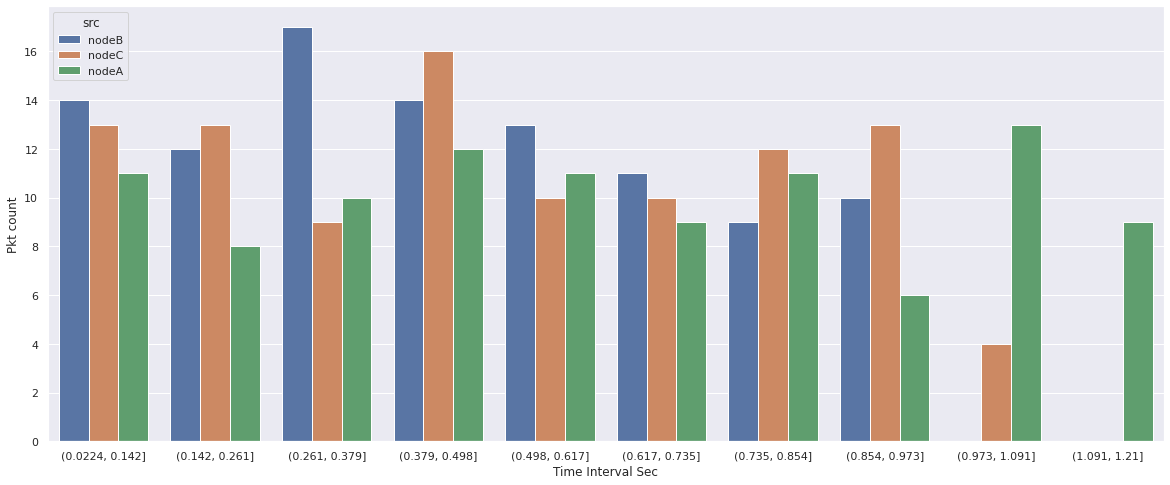

Decoded message number 3.0 b'\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


In [131]:
# --- IMPLEMENTATION GOES HERE ---
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
df['intervals']=pd.cut(df.abstime,10)
#df.head(40)
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="intervals", hue="src", data=df)
ax.set(xlabel='Time Interval Sec', ylabel='Pkt count')
plt.show()

def decode(id):
    a=df.loc[df['id'] == id]
    m=[]
    for i in a['payload']:
        m.append(i)
    return bytes([b0 ^ b1 ^ b2 for b0, b1, b2 in zip(m[0], m[1], m[2])])

print(f"Decoded message number 3.0 {decode(3.0)}")
# --------------------------------

### Ejercicio 4 (1 punto)

En la simulación del apartado anterior no hay ningún método de sincronización entre los nodos. En este ejercicio se extenderá la clase `DCNode` a una clase `DCNodeSync` la cual utiliza el reloj del entorno de SimPy para la sincronización (`env.now`): en cada periodo, todos los nodos de la red envían un mensaje al servidor central.

Supondremos que la red utiliza un *scheduling* sencillo para decidir cual de los nodos envía datos en cada periodo. El periodo se define en la variable global *PERIOD*. Los nodos envían mensajes cuando el tiempo transcurrido es un múltiple de *PERIOD*: si no tienen datos para enviar, envían un mensaje dummy. En cambio, si tienen datos para enviar, solo uno de los nodos puede enviar datos durante ese periodo. Para asegurar que no hay colisiones, supondremos que el periodo de envío de cada nodo tiene un shift en el periodo. Por ejemplo, si tenemos una red de *N* nodos que denotamos $c_i$, el nodo $c_i$ envía mensajes cuando *id  mod n* es *i*, donde *id* es un contador que identifica el mensaje dentro de la secuencia de mensajes enviados. Si tenemos tres nodos, el primer nodo envía datos en los periodos $0, 3, 6, ...$, el segundo nodo en los periodos $1, 4, 7, ...$ y el tercer nodo en los periodos $2, 5, 8, ...$

Como antes, todos los nodos envían un documento y a cada nodo se le asocia un shift del periodo para enviar datos. Además, cuando nadie envíe un mensaje, todos los nodos envían un dummy (mensaje donde todo el payload es padding).


**Apartado A**. Implementa los siguientes métodos de la clase `DCNodeSync`:

- `__init__`: el constructor de la clase. Necesitaréis crear los atributos `period`, `period_id` y `last_id`, para determinar en qué periodo el nodo puede enviar datos.
- `gen_dummy`: este método devuelve un paquete con un payload vacío. Recordad que el payload tiene que haber sido codificado con los secretos del nodo.
- `next_period`: devuelve el tiempo del siguiente periodo.
- `run`: ejecuta el proceso de SimPy. Aquí tenéis que implementar la lógica principal del scheduling: qué se hace cuando se recibe un mensaje, el tiempo que el nodo tiene que esperar hasta el siguiente periodo y decidir si envía un dummy o un paquete de datos.

Además, tened en cuenta las siguientes indicaciones:

- Podéis utilizar el operador `|` para combinar la activación de múltiples eventos de SimPy en una operación OR.
- Utilizad `Environment.timeout` para crear retardos en la comunicación.

In [132]:
from math import ceil


class DCNodeSync(DCNode):
    def __init__(self, *args, **kwargs):
        """
        Initializes the attributes of the class.

        :param period: the period in which the DC's communicate.
        :param period_id: period in which this specific node sends data.
        :param last_id: counter that keeps track of the number of periods.
        :param n: number of DC nodes in the network.
        :param initial_delay: set the delay for the node
        :param msglen: set the size of the packets
        :param document: set the document to be sent by the node (bytes)
        """
        # --- IMPLEMENTATION GOES HERE ---
        self.period = kwargs['period']
        self.period_id = kwargs['period_id']
        self.last_id = 0
        self.n = kwargs['n']
        self.initial_delay=kwargs['initial_delay']
        self.store = simpy.Store(kwargs['env'])
        self.env = kwargs['env']
        self.out = None
        self.name = kwargs['name']
        self.msglen = kwargs['msglen']
        self.finish = float("inf")
        self.packets_sent=0
        self.total_packets = kwargs['total_packets']
        self.flow_id=0
        self.sent_size = 0
        self.action = env.process(self.run())
        self.document_sent =False
        self.document=kwargs['document']
        self.doc_part =0
        self.doc_total=len(self.document)/self.msglen
        # --------------------------------

    def gen_dummy(self):
        # --- IMPLEMENTATION GOES HERE ---
        Empty = bytes(self.msglen)
        return self.encode(Empty)
        # --------------------------------

    @property
    def next_period(self):
        # --- IMPLEMENTATION GOES HERE ---
        return self.last_id+1 * self.period
        # --------------------------------   
    
    def run(self):
        # --- IMPLEMENTATION GOES HERE ---
        # we set a threshold to sync all nodes 0.1
        yield self.env.timeout(0.1)
        while self.env.now < self.finish:
            # wait for the next transmission
            yield self.env.timeout(self.period)
            
            self.packets_sent += 1
            size = self.msglen
            self.sent_size += size
            if self.last_id % self.n == self.period_id and not self.document_sent and self.last_id*self.period> self.initial_delay:
                start=self.doc_part*self.msglen
                self.doc_part+=1
                end=self.doc_part*self.msglen
                payload=self.encode(self.document[start:end])
                #print(f"part {self.doc_part} => {self.document[start:end]}")
                #print("real")
                if self.doc_part>self.doc_total:
                      self.document_sent=True
            else:
                #print("dummy")
                payload=self.gen_dummy()
            #print(payload)
            self.last_id+=1
            
            # instantiate a packet and send it
            p = Packet(self.env.now, size, self.packets_sent, payload,
                       src=self.name, flow_id=self.flow_id)

            if self.packets_sent <= self.total_packets:
                self.out.put(p)
        # --------------------------------



**Apartado B (0.25 puntos)** Crea instancias de los objetos de la simulación y ejecutala. 
Asegurate de que las instancias de PacketGenerator tienen un retardo inicial (el atributo `initial_delay`).

In [133]:
env = simpy.Environment()  # Create the SimPy environment

PERIOD = 0.1  # period of the synchronization
# here you can choose the size of the packets
MSGLEN=5


In [134]:
# Instantiate the server
# --- IMPLEMENTATION GOES HERE ---
server = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
# --------------------------------

In [135]:
# Instantiate the nodes and the packet generator with delays
# --- IMPLEMENTATION GOES HERE ---
message1=b'\x44\x61\x6e\x69\x65\x6c\x20\x53\x61\x6e\x63\x68\x65\x7a\x20\x69\x73\x20\x74\x68\x65\x20\x54\x4f\x50\x4f'
message2=b'mensaje de prueba amapolas de colores para todos el mensaje es mas largo'
message3=b'Sistema de comunicacion DC en perfecto funcionamiento, este es mi documento supersecreto para que no lo vea la nsa'

nodeA=DCNodeSync(env=env,name="nodeA",msglen=MSGLEN,period=0.1,period_id=0,n=3,total_packets=100,document=message1,initial_delay=0.2)
nodeB=DCNodeSync(env=env,name="nodeB",msglen=MSGLEN,period=0.1,period_id=1,n=3,total_packets=100,document=message2,initial_delay=0.5)
nodeC=DCNodeSync(env=env,name="nodeC",msglen=MSGLEN,period=0.1,period_id=2,n=3,total_packets=100,document=message3,initial_delay=0.4)

# --------------------------------

In [136]:
# Assign the secrets to the nodes
# --- IMPLEMENTATION GOES HERE ---
import os
# genera un secreto para cada par de criptógrafos
def calc_secret(msglen):
    return os.urandom(msglen)

AB_secret=calc_secret(MSGLEN)
AC_secret=calc_secret(MSGLEN)
BC_secret=calc_secret(MSGLEN)
#setting nodeA secrets
nodeA.set_secrets([AB_secret,AC_secret])
#setting nodeB secrets
nodeB.set_secrets([AC_secret,BC_secret])
#setting nodeC secrets
nodeC.set_secrets([AB_secret,BC_secret])
# --------------------------------

In [137]:
# Instantiate the packet generator with delays
# --- IMPLEMENTATION GOES HERE ---
#implemented above
# --------------------------------

In [138]:
# Wire packet generators and sink together
# --- IMPLEMENTATION GOES HERE ---
nodeA.out=server
nodeB.out=server
nodeC.out=server
# --------------------------------

In [139]:
# run simulation and show log
# --- IMPLEMENTATION GOES HERE ---
env.run(until=20)
df = pd.DataFrame(server.log, columns=['id', 'src', 'abstime', 'size', 'payload'])
df.head(n=40)
# --------------------------------

,id,src,abstime,size,payload
0,1,nodeA,0.2,5,b'\xe2\xd6F\x82\x1b'
1,1,nodeB,0.2,5,b'\xe8.\x9b<\xd9'
2,1,nodeC,0.2,5,b'\n\xf8\xdd\xbe\xc2'
3,2,nodeA,0.3,5,b'\xe2\xd6F\x82\x1b'
4,2,nodeB,0.3,5,b'\xe8.\x9b<\xd9'
5,2,nodeC,0.3,5,b'\n\xf8\xdd\xbe\xc2'
6,3,nodeA,0.4,5,b'\xe2\xd6F\x82\x1b'
7,3,nodeB,0.4,5,b'\xe8.\x9b<\xd9'
8,3,nodeC,0.4,5,b'\n\xf8\xdd\xbe\xc2'
9,4,nodeA,0.5,5,b'\xa6\xb7(\xeb~'


---

**Apartado C (0.25 puntos)** Haced un histograma que muestre el volumen del tráfico que el servidor ha recibido de cada nodo. Haced la partición del rango de tiempo en 10 intervalos.

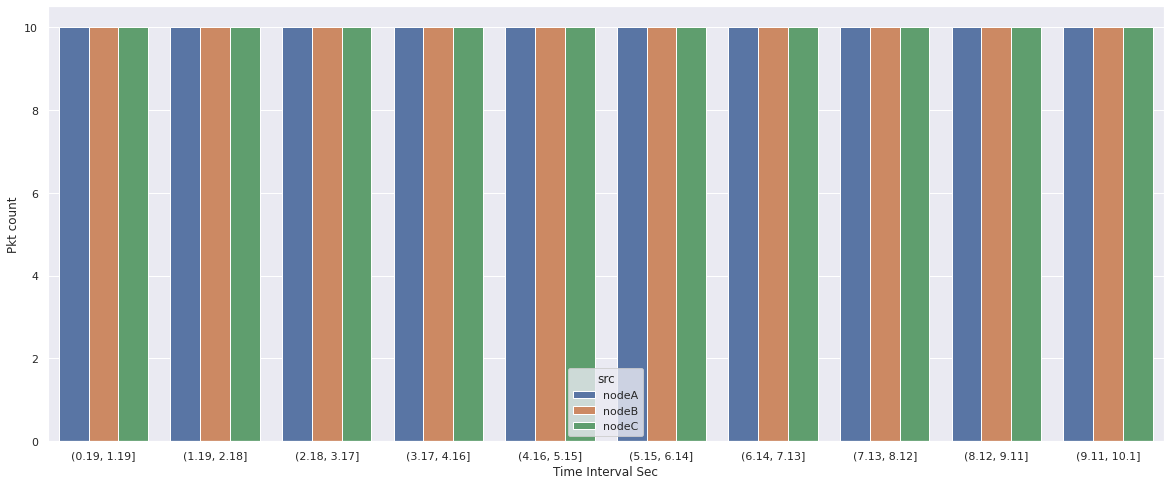

In [140]:
# --- IMPLEMENTATION GOES HERE ---
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
df['intervals']=pd.cut(df.abstime,10)
#df.head(40)
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="intervals", hue="src", data=df)
ax.set(xlabel='Time Interval Sec', ylabel='Pkt count')
plt.show()
# --------------------------------

---

**Apartado D (opcional)** Haced la decodificación de los paquetes que recibe el servidor para comprobar que, efectivamente, podemos recuperar los documentos.

In [141]:
# --- IMPLEMENTATION GOES HERE ---
def decode(id):
    a=df.loc[df['id'] == id]
    m=[]
    for i in a['payload']:
        m.append(i)
    return bytes([b0 ^ b1 ^ b2 for b0, b1, b2 in zip(m[0], m[1], m[2])])

def get_message(id_server,num_packets,n):
    message=[]
    for i in range(1,int(num_packets/n)):
        if i % n == id_server:
            #print(i)
            message+=(decode(i).decode("utf-8"))
    return ''.join(message)
# choose 0,1 or 2 you have to set the number of packet to match your simulation and n is the number of nodes
id_server=0        
print(f"Decoded message number {id_server} =>> {get_message(id_server,300,3)}")
# --------------------------------

Decoded message number 0 =>>      Sistema de comunicacion DC en perfecto funcionamiento, este es mi documento supersecreto para que no lo vea la nsa                                              


### Parte 2: Preguntas (2.5 puntos)

Si no habéis podido resolver los ejercicios de programación, utilizad los datos de los ficheros `sim_result3.csv` y `sim_result4.csv` en caso de que necesitéis los datos para responder las preguntas siguientes.

####  Q1 (0.5 puntos). Explicad las diferencias entre los datos del volumen de la comunicación obtenidos en el apartado C de los ejercicios 3 y 4. ¿Cómo puede un adversario explotar esta información en cada caso?

<div class="alert alert-block alert-success">
Respuesta: En el ejercicio 3 los paquetes se enviaban de forma aleatoria lo que hace que se pueda ver tiempos en los que algunos nodos envían más paquetes que otros además no hay mensajes dummy por lo que un atacante podría inferir que nodos están envíando mensajes.
    En el ejercicio 4 en cambio en cada periodo todos los nodos mandan los mismos mensajes ya que están sincronizados y enviaran o bien mensajes con contenido o bien mensajes vacíos pero todos los nodos enviarán los mismos mensajes lo que hace que un adversario no pueda inferir nada de los metadatos (si cambiaramos los pares de secretos en cada envío). Esto se puede ver perfectamente en los histogramas obtenidos
    
</div>

#### Q2 (0.5 puntos). ¿Se consigue el anonimato respecto al servidor? ¿Y respecto a terceros? Justifica la respuesta.

<div class="alert alert-block alert-success">
Respuesta: El servidor no puede saber quien envía el documento, pero si que puede ver el contenido del mismo ya que dispone de todos los payloads y simplemente tiene que hacer el xor, pero si que existe anonimato respecto al servidor con respecto a quien es el nodo que envía el documento (en realidad en nuestra implementación no ya que no cambiamos el par de secretos en cada transmisión por lo que los mensajes dummies se repiten y el servidor puede inferir quien envía el mensaje al repetirse los mensajes dummies de los otros dos servidores). En cuanto a terceros si que hay anonimato ya que no pueden saber tampoco quien envía el documento y además no pueden obtener nada de los metadatos ya que en cada periodo todos los nodos envían un mensaje que puede ser con contenido o dummy, por lo que si que ofrece anonimato con respecto a terceros.
</div>

####  Q3 (0.5 puntos). Explicad qué pasa si, en la simulación del ejercicio 3, el servidor intenta codificar los mensajes que recibe de los nodos.

<div class="alert alert-block alert-success">
Respuesta: En nuestra simulación como solamente uno de los nodos envíaba mensajes con contenido de los 3 el servidor si que puede codificar los mensajes ya que todos los mensajes llevan un id por lo que tal y como vimos en ese apartado aunque estuvieramos enviando simples 1, el servidor podía decodificar si coge los tres mensajes con el mismo id y hace xor, pero esto solo es así porque solo uno de los nodos está mandando x01 y el resto envían mensajes vacíos. En el momento que todos los nodos quisieran enviar mensajes al no existir una sincronización el servidor no podría codificar ninguno de los mensajes. Esto es por que el protocolo DC necesita que solo uno de los nodos envíe datos por cada comunicación.
    
</div>

#### Q4 (0.5 puntos). Analizad la eficiencia de la red DC del ejercicio 4. Para cuantificar la eficiencia, medid el overhead del volumen de los datos de la aplicación que se envían respecto al volumen total de la comunicación.

<div class="alert alert-block alert-success">
Respuesta: Se envían en cada ronda 3 paquetes de datos de los que 2 son dummy y uno contiene datos también producirá el overhead el padding del último paquete del documento con un ejemplo imaginemos el coste del overhead del mensaje 2 de nuestra comunicación si utilizamos paquetes de tamaño 5. En cualquier caso el overhead será el resultado de dividir el coste de la comunicación por entre lo que hubiera costado enviar solo los paquetes del mensaje. Como podemos ver el coste del overhead es de 2.04 ya que el padding del último paquete del mensaje también causa overhead por eso no es exactamente 2.
    
</div>

In [142]:
# cal message 2 length
mes_len=len(message2)
# calculate padding for the block size
block_size = 5
pad = (mes_len+1) % block_size
# calculate dummies
dummies = 2* (mes_len+pad)
# calculate overhead
overhead = (dummies + pad)/(mes_len+pad)
print(f"The overhead for a block size {block_size} is {overhead}")

The overhead for a block size 5 is 2.04


#### Q5 (0.5 puntos). Uno de los problemas de las redes DC es que son muy vulnerables a los ataques de denegación del servicio por parte de los nodos. Describe, a grandes rasgos, métodos que se te acudan para detectar y mitigar estos ataques.

<div class="alert alert-block alert-success">
Respuesta: En este caso si el ataque de denegación lo realiza un nodo de la red cambiando el contenido de su bit compartido realmente no se puede saber que nodo es el que está realizando la denegación de servicio ya que su paquete a todos los efectos es un paquete bien formado. La única forma de comprobarlo es sabiendo que nodo tenía que enviar información en ese ciclo y conocer los pares de secretos compartidos por los 3 nodos de forma que se podría idenficar el nodo que está realizando el ataque de denegación. Si bien esto no tiene sentido ya que si se dispone de esa información la red DC no tiene sentido como tal.
    
</div>